# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

- The dataset collected is related to 17 campaigns that
occurred between May 2008 and November 2010,
corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
import time
from sklearn.model_selection import cross_val_score



In [42]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [43]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [45]:
# Replacing 'unknown' with NaN
df = df.replace('unknown', pd.NA)

In [46]:
null_values = df.isnull().sum()
null_values

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [47]:
#dropping unknowns
df_cleaned = df.dropna()

In [48]:
df_cleaned

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [49]:
# dropping duration since "his input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model."
df_cleaner = df_cleaned.drop('duration', axis=1)
df_cleaner

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [50]:
# Mapping conditions
education_mapping = {
    'basic.9y': 'Basic',
    'basic.4y': 'Basic',
    'basic.6y': 'Basic',
    'high.school': 'High School',
    'university.degree': 'University Degree',
    'professional.course': 'Professional Course',
    'illiterate': 'Illiterate'
}

df_cleaner['education'] = df_cleaner['education'].map(education_mapping)

In [51]:
job_mapping = {
    'admin.': 'Admin & Management',
    'management': 'Admin & Management',
    'entrepreneur': 'Entrepreneur & Self-Employed',
    'self-employed': 'Entrepreneur & Self-Employed',
    'blue-collar': 'Working Class',
    'housemaid': 'Working Class',
    'technician': 'Working Class',
    'services': 'Working Class',
    'retired': 'Retired',
    'student': 'Student',
    'unemployed': 'Unemployed',
}

df_cleaner['job'] = df_cleaner['job'].map(job_mapping)

In [52]:
default_mapping = {
    'no': 0,
    'yes': 1,
}

df_cleaner['default'] = df_cleaner['default'].map(default_mapping)


In [53]:
y_mapping = {
    'no': 0,
    'yes': 1,
}

df_cleaner['y'] = df_cleaner['y'].map(y_mapping)


In [54]:
housing_mapping = {
    'no': 0,
    'yes': 1,
}

df_cleaner['housing'] = df_cleaner['housing'].map(housing_mapping)


In [55]:
loan_mapping = {
    'no': 0,
    'yes': 1,
}

df_cleaner['loan'] = df_cleaner['loan'].map(loan_mapping)


In [56]:
df_cleaner

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,Working Class,married,Basic,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,Working Class,married,High School,0,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,Admin & Management,married,Basic,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,Working Class,married,High School,0,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,Admin & Management,married,Professional Course,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,Retired,married,Professional Course,0,1,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,Working Class,married,Professional Course,0,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,Retired,married,University Degree,0,1,0,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,Working Class,married,Professional Course,0,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [57]:
df_cleaner.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  int64  
 5   housing         30488 non-null  int64  
 6   loan            30488 non-null  int64  
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  campaign        30488 non-null  int64  
 11  pdays           30488 non-null  int64  
 12  previous        30488 non-null  int64  
 13  poutcome        30488 non-null  object 
 14  emp.var.rate    30488 non-null  float64
 15  cons.price.idx  30488 non-null  float64
 16  cons.conf.idx   30488 non-null  float64
 17  euribor3m       30488 non-null  floa

Text(0.5, 1.0, 'age of creditor')

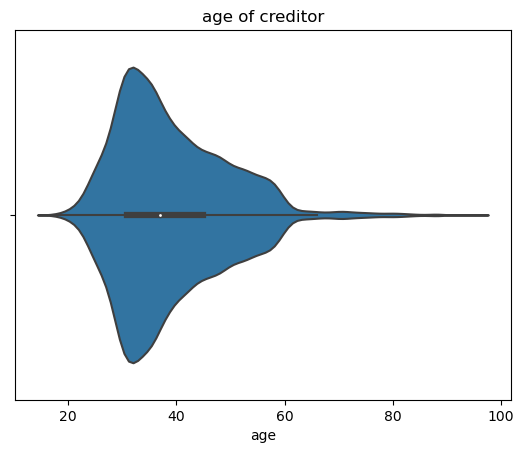

In [58]:
#checking for significant outliers in numeric columns
sns.violinplot(x=df_cleaner["age"])
plt.title('age of creditor')

Text(0.5, 1.0, 'pdays of creditor')

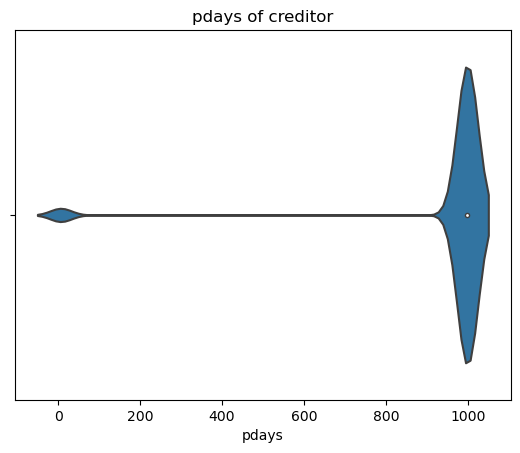

In [59]:
sns.violinplot(x=df_cleaner["pdays"])
plt.title('pdays of creditor')

Text(0.5, 1.0, 'previous of creditor')

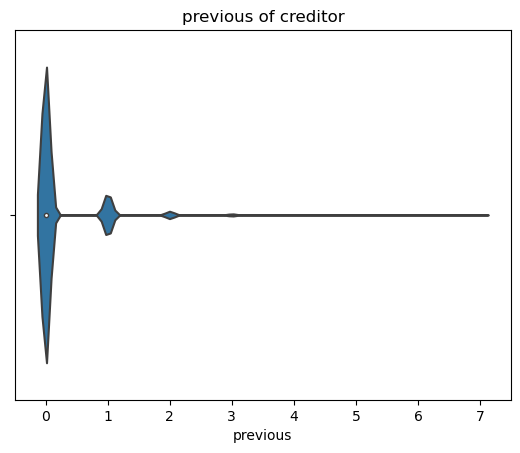

In [60]:
sns.violinplot(x=df_cleaner["previous"])
plt.title('previous of creditor')

Text(0.5, 1.0, 'emp.var.rate of creditor')

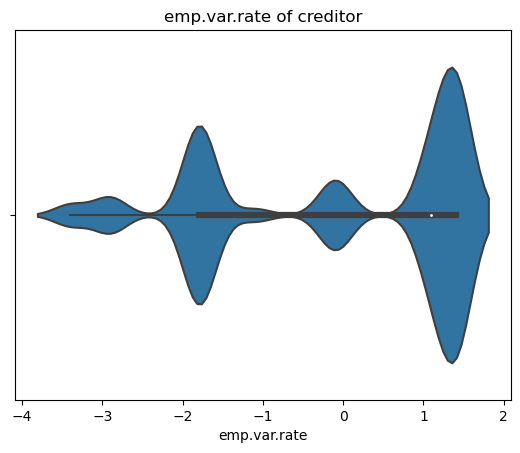

In [61]:
sns.violinplot(x=df_cleaner["emp.var.rate"])
plt.title('emp.var.rate of creditor')

Text(0.5, 1.0, 'cons.price.idx of creditor')

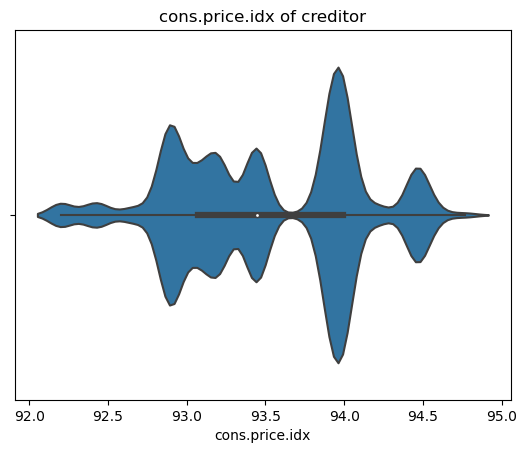

In [62]:
sns.violinplot(x=df_cleaner["cons.price.idx"])
plt.title('cons.price.idx of creditor')

Text(0.5, 1.0, 'cons.conf.idx of creditor')

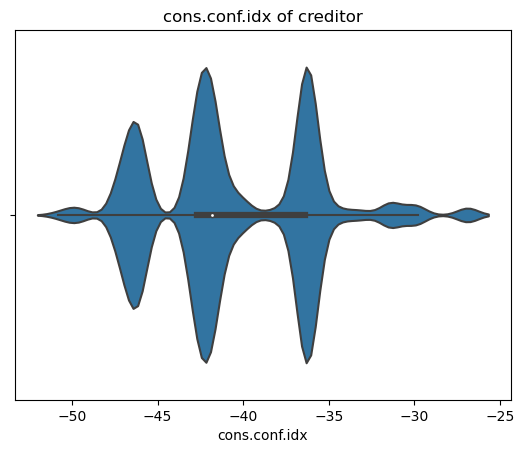

In [63]:
sns.violinplot(x=df_cleaner["cons.conf.idx"])
plt.title('cons.conf.idx of creditor')

Text(0.5, 1.0, 'euribor3m of creditor')

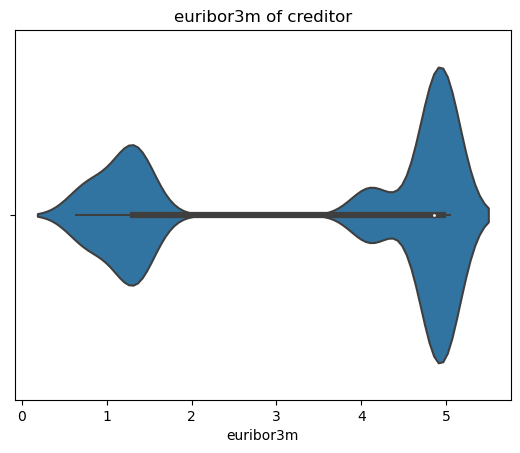

In [64]:
sns.violinplot(x=df_cleaner["euribor3m"])
plt.title('euribor3m of creditor')

Text(0.5, 1.0, 'nr.employed of creditor')

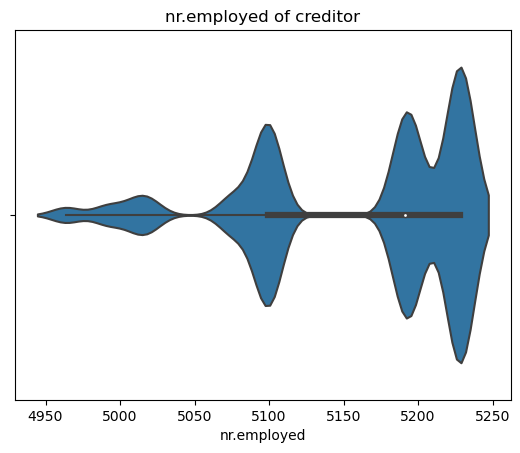

In [65]:
sns.violinplot(x=df_cleaner["nr.employed"])
plt.title('nr.employed of creditor')

In [66]:
#finalizing data
data = df_cleaner

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

- Looking at the CRISP-DM-BANK document provided, the business objective of comparing the performance of the classifiers is to better marketing campaigns for banking products through phone contact

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [83]:
columnstokeep = ['age','job','marital','education','default','housing','loan','y']
df = data[columnstokeep]
df

,age,job,marital,education,default,housing,loan,y
0,56,Working Class,married,Basic,0,0,0,0
2,37,Working Class,married,High School,0,1,0,0
3,40,Admin & Management,married,Basic,0,0,0,0
4,56,Working Class,married,High School,0,0,1,0
6,59,Admin & Management,married,Professional Course,0,0,0,0
...,...,...,...,...,...,...,...,...
41183,73,Retired,married,Professional Course,0,1,0,1
41184,46,Working Class,married,Professional Course,0,0,0,0
41185,56,Retired,married,University Degree,0,1,0,0
41186,44,Working Class,married,Professional Course,0,0,0,1


In [84]:


# Selecting categorical columns
categorical_features = ['job', 'marital', 'education']

encoder = OneHotEncoder(sparse_output=False)

encoded_features = encoder.fit_transform(df[categorical_features])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

#drop original categorical columns from df and concatenate the encoded features
df = df.drop(categorical_features, axis=1).reset_index(drop=True)
df_encoded = pd.concat([df, encoded_features_df], axis=1)


In [85]:
#scaling numeric
scaler = StandardScaler()

df_encoded['age'] = scaler.fit_transform(df_encoded[['age']])


In [86]:
df_encoded

,age,default,housing,loan,y,job_Admin & Management,job_Entrepreneur & Self-Employed,job_Retired,job_Student,job_Unemployed,job_Working Class,marital_divorced,marital_married,marital_single,education_Basic,education_High School,education_Illiterate,education_Professional Course,education_University Degree
0,1.642253,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.196452,0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.093870,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.642253,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.932575,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,3.287410,0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30484,0.674513,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30485,1.642253,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
30486,0.480965,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [87]:
#splitting into X and y
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [88]:
#test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [89]:
#setting up baseline
majority_class = y_train.mode()[0]
baseline_predictions = [majority_class] * len(y_train)

baseline_accuracy = accuracy_score(y_train, baseline_predictions)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.8743


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [90]:
pipe = Pipeline([('linreg', LinearRegression())])
pipe.fit(X_train, y_train)
pipe

Pipeline(steps=[('linreg', LinearRegression())])

In [91]:
lr_y_pred = pipe.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [92]:
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_mse

0.11000459234356372

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [93]:
#setting up models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}


In [94]:
#setting up metrics for data frame
performance_metrics = {
    "Model": [],
    "Train Time": [],
    "Train Accuracy": [],
    "Test Accuracy": []
}

In [95]:
#scoring models
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    performance_metrics["Model"].append(name)
    performance_metrics["Train Time"].append(train_time)
    performance_metrics["Train Accuracy"].append(train_accuracy)
    performance_metrics["Test Accuracy"].append(test_accuracy)


In [96]:
#results
performance_df = pd.DataFrame(performance_metrics)
performance_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.127455,0.874293,0.869957
1,KNN,0.003516,0.874703,0.859790
2,Decision Tree,0.030839,0.892743,0.859462
3,SVM,13.948898,0.874334,0.869957


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

I think in this case it makes sense to drop gender to avoid potential bias in the model

In [97]:
#optimizing knnn model
k_range = range(1, 31)
k_scores = []


In [100]:
#finding optimal k 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())


In [101]:
#determining optimal k 
optimal_k = k_range[np.argmax(k_scores)]
print("Optimal value of K:", optimal_k)

Optimal value of K: 26


In [102]:
#setup optimum model with iptimum k 
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance')


In [103]:
#fitting model
knn_optimal.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=26, weights='distance')

In [104]:
#evaluating model performance
train_accuracy = knn_optimal.score(X_train, y_train)
test_accuracy = knn_optimal.score(X_test, y_test)


print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.8927
Test Accuracy: 0.8627


- Looks like it didn't make a huge impact 

In [105]:
#looking at Logistic Regression by using grid search 
# Define the model
log_reg = LogisticRegression(max_iter=10000)

In [106]:
# Define a grid of hyperparameters to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}


In [107]:

# Set up the grid search with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

#fit model 
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [108]:

# The best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on the test set
test_accuracy = grid_search.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Hyperparameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.8700


In [109]:
#grid search yielded better results

- Logistic grid search seems to be the best model at this time

##### Questions